## 模型部署

飞桨不仅是一个深度学习框架，还是集深度学习核心框架、基础模型库、端到端开发套件、工具组件和服务平台于一体，为用户提供了多样化的配套服务产品，助力深度学习技术的应用落地。

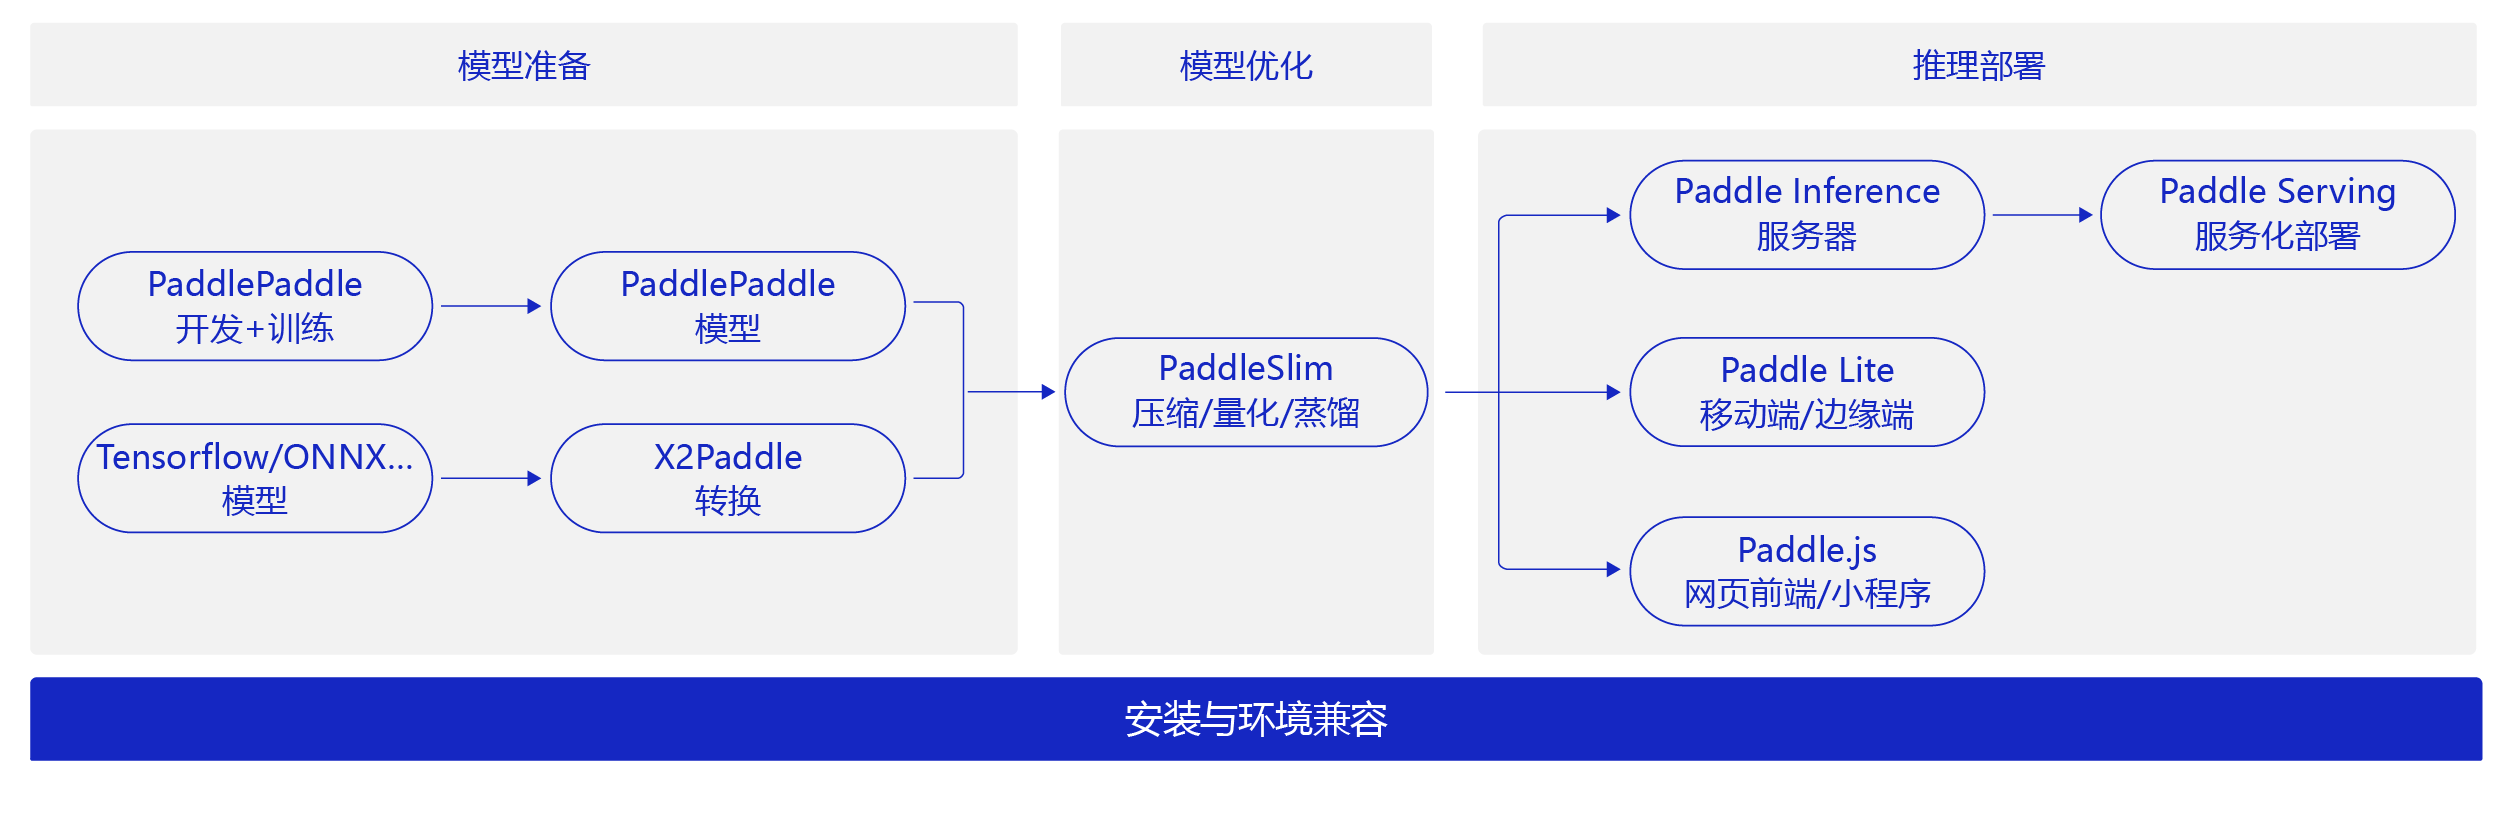

模型部署面临和训练完全不一样的硬件环境和性能要求：
- 更广泛的硬件环境适配：资讯推荐（高性能服务器），人脸支付（移动端），工业质检（嵌入式端）
- 更极致的计算性能：服务压力导致对时延（用户交互体验）和吞吐（海量用户并发）的要求

### 模型部署组件

- Paddle Inference：飞桨原生推理库，用于服务器端模型部署，支持Python、C/ C++等多语言。
- Paddle Serving：飞桨服务化部署框架 ，用于云端服务化部署，可以将模型作为单独的预测服务。
- Paddle Lite：飞桨轻量化推理引擎，用于 Mobile 及 IoT （如嵌入式设备芯片）等场景的部署。
- Paddle.js：使用 JavaScript（Web）语言部署模型，在网页和小程序中便捷的部署模型。
- 部署辅助工具 PaddleSlim：模型压缩，在保证模型精度的基础上减少模型尺寸，以得到更好的性能或便于放入存储较小的嵌入式芯片。
- 部署辅助工具 X2 Paddle：将其他框架模型转换成Paddle模型，然后即可使用飞桨的一系列工具部署模型。

### 模型部署场景

- 跑一批测试样本，快速预测结果：使用Paddle Inference的Python接口，跑一批测试样本，快速得到结果。
- 在业务系统中加入模型：在业务系统中使用Paddle Inference的C++/C接口，其他编程语言的业务系统可以对接到C API扩展实现模型预测。如果业务系统是C/S或B/S模式，也可以使用Paddle Serving将模型服务化，供各种业务系统或客户端远程访问预测服务。
- 移动端软件/嵌入式软件（APP/Web/智能设备）中加入模型：使用PaddleSlim对模型大小进一步压缩后，可以使用Paddle Lite构建APP及嵌入式端的模型，或者使用Paddle.js构建Web/小程序中使用的模型。
- X2 Paddle：将其他框架的模型转换成Paddle的模型，之后可以使用上述工具完成模型部署。

模型的推理和模型的训练有着不同的硬件环境和性能要求。所以，部署模型多是使用飞桨的`save_inference_model`保存的模型，而不是使用框架自带的`paddle.save`接口。Inference 模型会额外保存模型的结构信息，在推理速度上性能优越、灵活方便，适合与实际系统集成。

### Paddle Inference

Paddle Inference是飞桨原生推理库，使用静态图或者动态图保存Inference模型，在C++后端调用模型，并部署到高性能的业务系统中。

Paddle Inference应用场景，按照API接口类型可以分C++, Python, C, Go和R。
- Python适合直接应用，可通过Python API实现性能要求不太高的场景的快速支持
- C++接口属于高性能接口，可与线上系统联编
- C接口是基于C++，用于支持更多语言的生产环境

模型部署首先要有部署的模型文件,在模型训练过程中或者模型训练结束后，可以通过`save_inference_model`接口来导出标准化的模型文件。
- `save_inference_model`可以根据推理需要的输入和输出, 对训练模型进行剪枝, 去除和推理无关部分, 得到的模型相比训练时更加精简, 适合进一步优化和部署
- `paddle.save`和`paddle.load`接口，更多是用于模型训练后测试预测效果，而追求高性能的上线系统，优先推荐Paddle inference产品提供的接口

### Paddle Serving

- Paddle Serving是飞桨服务化部署框架，能够帮助开发者轻松实现从移动端、服务器端调用深度学习模型的远程预测服务。
- Paddle Serving具备完整的在线服务能力，支持的功能包括多模型管理、模型热加载、基于Baidu-RPC的高并发低延迟响应能力、在线模型A/B实验等，并提供简单易用的Client API.
- Paddle Serving可以与飞桨训练框架联合使用，从而训练与远程部署之间可以无缝过度，让用户轻松实现预测服务部署，大大提升了用户深度学习模型的落地效率。
- 使用Paddle Serving成功部署模型后，可以将模型预测作为在线服务，预测服务可以通过HTTP或RPC请求访问，可供多种类型的端灵活调用。

### Paddle Lite

飞桨轻量化推理引擎Paddle Lite支持包括手机移动端和嵌入式端在内的端侧场景，支持广泛的硬件和平台，是一个高性能、轻量级的深度学习推理引擎。

Paddle Lite推理部署流程：
1. 模型训练阶段：主要解决模型训练，利用标注数据训练出对应的模型文件。面向端侧进行模型设计时，需要考虑模型大小和计算量。
2. 模型部署阶段：
    - 模型转换：如果是Caffe, TensorFlow或ONNX平台训练的模型，需要使用X2Paddle工具将模型转换到飞桨的格式。
    - (可选步骤)模型压缩：主要优化模型大小，借助PaddleSlim提供的剪枝、量化等手段降低模型大小，以便在端上使用。
    - 将模型部署到Paddle Lite。
    - 在终端上通过调用Paddle Lite提供的API接口（C++、Java、Python等API接口），完成推理相关的计算。

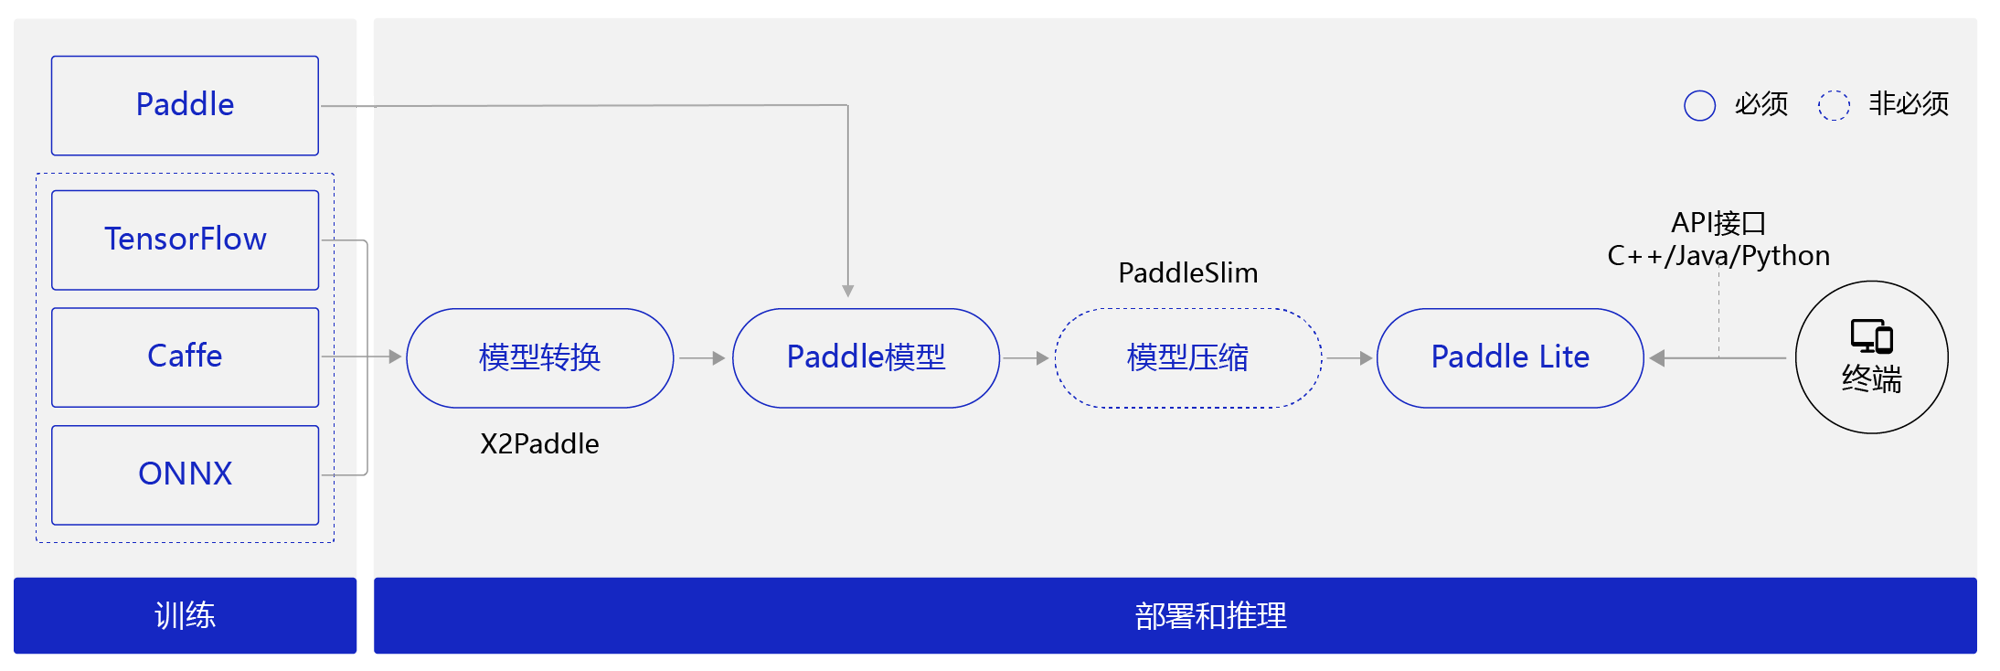

### Paddle Slim

PaddleSlim是飞桨开源的模型压缩工具库，包含模型剪裁、定点量化、知识蒸馏、超参搜索和模型结构搜索等一系列模型压缩策略，专注于模型小型化技术。